# Neural Networks - Deep Learning #
## Iordanis Kokkinidis - 3412 ##
## *First Project* ##

# About the Project #

 We are creating a Multilayer-Perceptron Neural Network, that is trained by back-propagation to recognize digits from 0 to 9. We will use the MNIST dataset of handwritten digits, as we used in the intermediary project, that consists of 70,000 images that are 28 by 28 pixels. We say that there are 10 classes, since we have 10 different digits (and 10 different labels for these digits). This is a classification problem and we will be comparing our Neural Network to the SKLearn's K Nearest Neighbor and Nearest Centroid Classifiers we used in the intermediary project, in terms of accuracy and time.

 We will be building a basic Deep Neural Network with 4 layers in total: 1 input layer, 2 hidden layers and 1 output layer. All layers will be fully connected.  

## Neural Network ##



## Perceptron ##

## Network Architecture ##

 Let's try to define the architecture of our network. To be able to classify digits, we must end up with the probabilities of an image belonging to a certain class. The class with the highest probability will be the network’s prediction.
 
 - Input Layer: In this layer we input our dataset, consisting of 28x28 images. Therefore, we flatten these images into one array (or vector) of 784 elements, one for each pixel of our picture. Therefore, our input layer will have 784 nodes.
 - Hidden Layers: Our network consists of two hidden layers, one with 256 and one with 128 neurons. These hidden layers are fully connected to one another, as well as to the input and output layers. Each of the hidden layers has an Activation function in order to pass its the output (Z = X W.T + B) through this function, so that we can solve the non-linear problem of the handwritten digit classification. In our case, the Activation function is ReLU.
 - Output Layer: The output layer consists of 10 neurons, each representing one class of our classification problem (digits 0-9). The output of this layer is again passed through an Activation function, this time through the Softmax function, that produces numbers between 0 and 1, in order to represent the probability of each class. The neuron with the highest value (therefore the class with the highest probability) is the networks prediction.
  

### Imports ###
We start by importing some standard libraries that we will need. We import numpy, so that we can use it for storing our data in np.arrays (matrices and vectors) and other linear algebra calculations. We import pyPlot, that we are going to use for creating our charts. Last but not least, we import the mnist dataset from keras.datasets, which holds 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
We also import some utility libraries like *time* and *random*.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist 
import time
import random

%matplotlib inline

## Loading the data ##

We load the data from the `mnist.dataset`, using `mnist.load_data()` and store each NumPy array in the appropriate NumPy array. For example, we have X_train containing the images of the training set and y_train containing the labels of the training set.

We then reshape the X_train and X_test NumPy arrays from (60000, 28, 28) and (10000,  28, 28) to (60000, (28 \* 28)) and  (10000, (28 \* 28)) respectively, basically transforming each image's 28 \* 28 pixel matrix to a a vector.
We also keep the original dataset in the X_train_og and X_test_og NumPy arrays, in order to use them later when we want to plot the (28 \* 28) images.

In [98]:
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  X_train_og = X_train
  X_test_og = X_test
  
  X_train = X_train.reshape(60000, (28*28))
  X_test = X_test.reshape(10000, (28*28))
  
  return X_train, y_train, X_test, y_test, X_train_og, X_test_og

### Utillity functions ###

Below we define two utillity functions that will help us with one-hot encoding and batches.

##### The `to_categorical()` function #####

This function is used to convert the label arrays *y* in to *one hot encoding* ___labels___ _(e.g., 4 = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0] )_. It takes as as parameters a numpy array `x` and the `number_of_columns` that each label will have (10). The function creates a numpy array of zeros (`np.zeros((x.shape[0], number_of_columns`) of shape [`x.shape()` , `number_of_columns`] and adds a 1 to the numpy array cell that is appropriate to create the `one_hot` label.

##### The `batch_loader()` fucntion #####

This function generates batches for the training of the Neural Network. It creates a numpy array with a size of `batch_size`, which by default is 64. Every batch of 64 samples is yielded, untill the whole of the dataset has been loaded in batches. ___Batches are used in the training of the Neural Network, so that we do not calculate the gradient for each data sample, since this would take a lot of time.___ 

In [99]:
def to_categorical(x, number_of_columns=None):
    if not number_of_columns:
        number_of_columns = np.amax(x)+1
    
    one_hot = np.zeros((x.shape[0], number_of_columns ))
    one_hot[np.arange(x.shape[0]), x] = 1
    return one_hot

def get_accuracy(y, pred):
    return np.sum(y == pred, axis = 0) / len(y)

def batch_loader(X, y = None, batch_size=64):
  """ Generates batches for training"""
  samples = X.shape[0]
  for i in np.arange(0, samples, batch_size):
    begin, end = i, min(i + batch_size, samples)
    if y is not None:
      yield X[begin:end], y[begin: end]
    else:
      yield X[begin:end]

##### Loading the data in X_train, y_train, X_test, y_test, X_train_og and X_test_og arrays. #####

We use the function defined above to load our data. We then preprocess our data, using the `to_categorical()` function defined above for our labels and dividing our data samples by 255, in order to normalize their values between 0 and 1.

In [100]:
X_train, y_train, X_test, y_test, X_train_og, X_test_og = load_data() 
y_train, y_test = to_categorical(y_train.astype("int")), to_categorical(y_test.astype("int")) 
X_train = X_train / 255
X_test = X_test / 255

---

## Showing Images of our data ##

_The function below is used to show an image of our data, given an **index** (which sample we want to show) and the **X** and **Y** NumPy arrays of the data set_. We must use the **X_train_og** and **X_test_og** arrays, since we kept them in dimensions of _(60000, (28 \* 28))_ and _(10000, (28 \* 28))_ respectively. We use the _matplotlib library_ in order to plot the images of our data samples.

In [101]:
def image_show(index, X, Y):
    image = X[index]
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    print("Showing sample data "  + str(index) +  " with label: "+ str(np.argmax(Y[index]))),
    plt.show()

##### _Run the code below, to see a random data sample from the training set_ #####

Showing sample data 27138 with label: 2


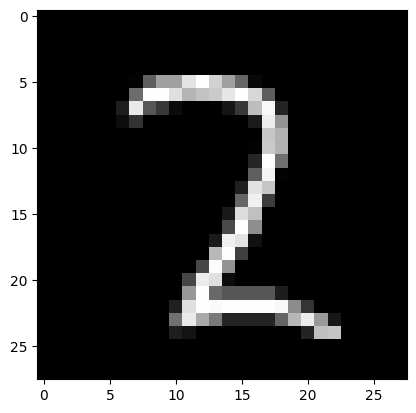

In [102]:
index = random.randrange(0,60000)
image_show(index, X_train_og, y_train)

### Printing the predictions ###

We have defined a method below, that prints the predictions of our Neural Network. The function takes as parameters the predictions array, which is the predictions of the neural network we want to print, the X_test_og array, in order to plot the image of the samples if we want, the y_test which is the array that holds the labels of our dataset, and two boolean variables called print_wrong_predictions and print_correct_predictions, so that we can specify what kind of predictions (or both) we want to see. It also takes a number_of_predictions parameter, that specifies how many predictions we want to see. This number must be between 1 and 10,000, although setting it to a large number might not be the optimal choice.

In this function, we use a pseudo-random number generator to generate a number between 0 and 10,000, that is the index of the data sample we are going to print, in order to show a number of different predictions each time and not all of them, since that will take some time and the output will not be very readable.

When an index is generated, we check if the `predictions[index]` is equal to the `y[index]` in order to determine if the prediction was correct or not. This is not only done so that we can accompany the image of our data sample with the appropriate label (i.e., the prediction was CORRECT!), but also to allow the user to only print correct or wrong predictions if he wishes.

*This works better if you run the python file and not the notebook*

In [103]:
def print_predictions(predictions, X, y, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print):
  for i in range(0, number_of_predictions_to_print):
    index = random.randrange(0,10000)
    if(np.argmax(predictions[index]) != np.argmax(y[index])):
      if(print_wrong_predictions):
        image_show(index,X, y)
        print("Neural Network's prediction: " , np.argmax(predictions[index]))
        print("The prediction was WRONG!")
        print("The correct label is: ", np.argmax(y_test[index]))
        print("\n")
    else:
      if(print_correct_predictions):
        image_show(index,X, y)
        print("Neural Network's prediction: " , np.argmax(predictions[index]))
        print("The prediction was CORRECT!")
        print("\n")

### Getting the wrong predictions ###

The function below is used to get the wrong predictions and the number of wrong predictions that the neural network has made. It takes as parameters the predictions of the network and the y (e.g., y_test) array, which holds the labels for our test data. We iterate through the predictions array `for i in range(1, 10000)` and check if the `predictions[i]` is not equal to the `y[i]`. If yes, then the `wrong_predictions_total`is incremented and that prediction is put in the wrong_predictions array. We finally return the `wrong_predictions` array and the `wrong_predictions_total`.

In [104]:
def get_wrong_predictions(predictions, y, set_size=10000):
  wrong_predictions = []
  wrong_predictions_total = 0
  for i in range(1, set_size):
    if((np.argmax(predictions[i])) != np.argmax(y[i])):
      wrong_predictions_total += 1
      wrong_predictions.append(i)
  return wrong_predictions, wrong_predictions_total

---
#### Neural Network Utillity functions ####

Finally, we will talk about utillity functions that we have defined to help us with the training and testing of our Neural Network, such as the loss and activation functions. Afterwards, we will discuss about the code for our Neural Network.

### Loss function ###

We are using Categorical Cross Entropy for our loss function. we create a `CrossEntropy()` class, that we will put in our neural network structure and use it to calculate the loss of our neural network. This class has two methods, apart from the constructor. the `loss()` method, is used to calculate the loss of the neural network based on the Cross Entropy formula. It takes the labels array y and the prediction array as parameters and returns the loss for those predictions ___( - y * log(y_hat) - (1-y) * log(1-y_hat) ).___ 
The other method that we have in the `CrossEntropy` class, is the `gradient()` function, which calculates the derivative of the loss (derivative of the Categorical Cross Entropy function). ___( - (y/y_hat) + (1-y)/(1-y_hat) )___

_Reminder: The projec's report has better mathematical notation_

In [105]:
#loss and activation functions
class CrossEntropy():
    def __init__(self):
        pass
    
    def loss(self, y, prediction):
        prediction = np.clip(prediction, 1e-15, 1- 1e-15)
        return -y*np.log(prediction) - (1 - y) * np.log(1 - prediction)
    
    def gradient(self, y, prediction):
        prediction = np.clip(prediction, 1e-15, 1- 1e-15)
        return -(y/prediction) + (1-y)/(1-prediction)

#### Activation Functions ####

For our Activation functions, we will use the ReLU function for our hidden layers and the SoftMax function for the output layer.
##### ReLU #####

The ReLU or Rectified Linear Unit function, is used to pass the output of a neuron (or layer of neurons) through an activation function to give the ability to our Neural Network to solve non linear problems, like that of the classification problem with 10 classes. We have created the `ReLU()` class, that has the `activation()` and `derivative()` methods. 
The `activation()` method takes the output of a layer `x` and implements the ReLU function, by returning the maximum number between 0 and x ( `np.maximum(0,x)` ), since ReLU is 0 for negative values of x and equal to x for positive values of x.
The `derivative()` method, calculates the derivative of the ReLU activation function with respect to the output of the layer `x`. The `derivative()` method returns 1 for positive values of x and 0 for negative values of x ( `np.where(x >= 0, 1, 0` ) 

##### SoftMax #####
The Softmmax function is used in the output layer, in order to put the values of the outcome of our Neural Network, or predictions if you will, in range of 0 - 1, signifying the probability that each class has to be the correct class for the prediction. Like the `ReLU()` class, we have two methods, the `activation()` and the `derivative()` methods.
The `activation()` method takes the output of the output layer `x` and implements the softmax function. e^(x) / Sum(e^(x))
The `derivative()` method calculates the derivative of the softmax function p * (1 - p), where p = e_x / Sum(e_x)

_Reminder: The projec's report has better mathematical notation_

In [106]:
class ReLU():
    def __init__(self):
        pass
    def __call__(self, x):
        return self.activation(x)
    def activation(self, x):
        return np.maximum(0,x)
    def derivative(self, x):
        return np.where(x >= 0, 1, 0)
        
class SoftMax():
    def __init__(self): pass
  
    def __call__(self, x):
        return self.activation(x)
    
    def activation(self, x):
        e_x = np.exp(x - np.max(x, axis = -1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims = True)
    
    def derivative(self, x):
        p = self.activation(x)
        return p * (1 - p)
      
# MORE ACTIVATION FUNCTIONS COULD BE IMPLEMENTED BELOW IF WE WANT #

### Layer classes ###
We have two kinds of Layer classes. One is the Dense layer of our fully connected Neural Network and one is the Activation Layer, which represents the activation functions of our neurons. Both of them have the same methods for `forward_pass()` and `back_propagation()`, but their function is quite different.

##### Activation Layer #####
The activation layer has several fields. An activation field, which holds one of the activation functions defined above (ReLU or Softmax), and the gradient (derivative of the error with respect to the output)
During the `forward_pass()`, the input from the `Dense` layer is passed through the activation function (`self.activation(x)`) and the output of that function is returned.

During `back_propagation()`, the gradient of the error is calculated (derivative of the error with respect to the output), `self.gradient(self.input) * output_error`. This gradient is returned to the previous `Dense` Layer of our Neural Network, in order to calculate the weights and biases gradient.

In [107]:
class Activation():
    def __init__(self, activation, name="activation"):
        self.activation = activation
        self.gradient = activation.derivative
        self.input = None
        self.output = None
        self.name = name
        
    def forward_pass(self, x):
        self.input = x
        self.output = self.activation(x)
        return self.output
    
    def back_propagation(self, output_error, learning_rate = 0.01):
        return self.gradient(self.input) * output_error
    
    def __call__(self, x):
        return self.forward_pass(x)
        


##### Dense Layer #####
The dense layer has fields for the parameters of our Neural Network (Weights and Biases). The weights and biases are initialized in the constructor of this class, where the weights are initialized randomly using `np.random` and the biases are initialized as 0, using `np.zeros`. During the `forward_pass()`, the input, which is either the input from the dataset for the input layer, or the output from the previous `Activation` layer (*meaning, the output of the previous (dense) layer passed through the activation function*) is used to calculate the output of this (dense) layer (`self.output = np.dot(self.input, self.weights) + self.biases`) based on the Z = W * X + B formula. 

During `back_propagation()` the gradient that is passed from the next `Activation` layer as output_error is used to calculate the input, weights and biases gradients(biases gradient is the same as output_gradient). We use the `weights_gradient` and `output_error` (biases gradient) to update the parameters
```
    self.weights -= learning_rate * weights_gradient
    self.biases -= learning_rate * np.mean(output_error)
```
and then we return the input gradient (`input_error`) to the "previous" layer, so that back propagation can continue (use that output_error to calculate that layer's gradients and update the parameters). 

In [108]:
class Dense_layer():
    def __init__(self, input_size, output_size, name="linear"):
        limit = 1/np.sqrt(input_size) #for initializing the weights
        self.weights = np.random.uniform(-limit, limit, (input_size, output_size))
        self.biases = np.zeros((1, output_size))
        
        self.input = None
        self.output = None
        self.name = name
        
    def forward_pass(self, x):
        self.input = x
        self.output = np.dot(self.input, self.weights) + self.biases # Z = W * X + B
        print(self.name)
        print("Input Shape: ", self.input.shape)
        print("Weights Shape: ", self.weights.shape)
        print("Biases Shape: ", self.biases.shape)

        print("OUTPUT SHAPE: ",self.output.shape)
        
        return self.output
    
    def back_propagation(self, output_error, learning_rate = 0.01):
        input_error = np.dot(output_error, self.weights.T)  #calculate the input gradient
        weights_gradient = np.dot(self.input.T, output_error) #calculate the weights gradient
        
        #update the parameters
        self.weights -= learning_rate * weights_gradient
        self.biases -= learning_rate * np.mean(output_error)
        return input_error
    
    def __call__(self, x):
        return self.forward_pass(x)
        

### Neural Network Class ###

Below, we create the `Neural_network()` class, which will be the mode of our neural network. The most important field that this class has, is the `layers` field, that is initialized in the constructor. The `layers` field is a list of all the layers in our Neural Network. During the initialization of the `layers` we create objects from the classes defined above as `Dense_layer` and `Activation`, passing the dimensions we want for the layers (and their output, which needs to be the same as the next layer's dimensions) as parameters. For this Network, we created 4 layers, one input layer with 784 neurons, two hidden layers with 256 and 128 neurons respectively, and an output layer with 10 neurons, one for each of the classes we want to classify our input as. 
___We can experiment with our network, by changing the number of hidden layers, or even the number of neurons in the hidden layers. One other thing we could do is implement a sigmoid activation function and use it as the `Activation` in our network.___
We also pass the `learning_rate` as a parameter in the initialization of our network. 
For the `Neural_network()` class, we define a `forward_pass()` and a `back_propagation()` method, as well as a `train()` method, where both of the previous ones are called from.

The `forward_pass()` method simply calls each layer (for the layer class `__call__` method, the `forward_pass()` method is called) with `x` being the batch of data we are passing through our neural network.

The `back_propagation()` method calls the `back_propagation()` method for each layer (in reverse order) passing the `learning_rate` and `loss_gradient` as a parameter. The `loss_gradient` is updated after each call to the layer's `back_propagation()` method and continues to be passed to the previous one.

The `train()` method, is called from the driver program and expects the number of epochs as a parameter. During training, we use the batch_loader to load batches in the `x_batch` and `y_batch` arrays. We calculate the output of our network for the batch, using the `forward_pass()`, and then we calculate the loss, accuracy and error of our network for that batch, using the `get_accuracy()`, `loss_function.loss()` and `loss_function.gradient()` methods, before we call on the `back_propagation()` method. This process is happening as long as the `batch_loader()` function yields batches and it is repeated for the number of epochs. After everything is done, we return the mean_loss, mean_accuracy and delta_time (time it took for the training process) to the driver program.


In [109]:
class Neural_network():
    def __init__(self, input_dimensions, output_dimensions, loss_function,  learning_rate = 0.01):
        #input dimensions is 784 and output dimensions is 10 for MNIST classification
        self.layers = [Dense_layer(input_dimensions, 256, name = "input"), 
                       Activation(ReLU(), name = "relu"),
                       Dense_layer(256, 128, name = "hidden"),
                       Activation(ReLU(), name = "relu2"),
                       Dense_layer(128, output_dimensions, name = "output"),
                       Activation(SoftMax(), name = "softmax")
                       ]
        self.learning_rate = learning_rate
        self.loss_function = loss_function
        
    def forward_pass(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def back_propagation(self, loss_gradient):
        for layer in reversed(self.layers):
            loss_gradient = layer.back_propagation(loss_gradient, self.learning_rate)
            
    def __call__(self, x):
        return self.forward_pass(x)

    def train(self, epochs):
        
        mean_loss = []
        mean_accuracy = []
        for epoch in range(epochs):
            loss = []
            accuracy = []
            for x_batch, y_batch in batch_loader(X_train, y_train):
                out = self(x_batch) #Forward Pass
                print("Prediction: ", out.shape)
                print("X_batch: ",x_batch.shape, "y_batch: ", y_batch.shape)
                loss.append(np.mean(self.loss_function.loss(y_batch, out))) #calculate loss (with cross entropy class)
                # print(get_accuracy(y_batch, out))
                accuracy.append(get_accuracy(np.argmax(y_batch, axis=1), np.argmax(out, axis=1))) #Network's accuracy
                error = self.loss_function.gradient(y_batch, out) #calculate gradient of loss (with cross entropy class)
                self.back_propagation(error) #Back Propagation

            
            # print(delta_time)
            mean_loss.append(np.mean(loss))
            mean_accuracy.append(np.mean(accuracy))
        return mean_loss, mean_accuracy      

## Driver Program ##

_Below we will create an object of our Neural Network class, train it and test it, as well as print some of it's predictions and some charts regarding it's accuracy, time, and loss._

We start by initializing the values of some of our __hyperparameters__, such as the number of `epochs`, `the loss_function` and the `learning_rate`. Those are all parameters that can be tweaked, in order to test a slightly different model of our Neural Network.

In [110]:
input_dimensions = 784 # (28 x 28)
output_dimensions = 10 # 10 classes (10 digits)

loss_function = CrossEntropy()
learning_rate = 0.001
epochs = 10

neural_network = Neural_network(input_dimensions, output_dimensions, loss_function, learning_rate)

In [111]:

start_time = time.process_time()
mean_loss, mean_accuracy = neural_network.train(epochs)
end_time = time.process_time()
delta_time = (end_time - start_time) * 1000
training_time = round(delta_time)
for epoch in range(0,epochs):
  print(f"Epoch {epoch + 1}, Loss: {mean_loss[epoch]}, Accuracy:  {mean_accuracy[epoch]}")
print(f"Time it took to train the model with 10 epochs: {training_time}ms")
    

input
Input Shape:  (64, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (64, 256)
hidden
Input Shape:  (64, 256)
Weights Shape:  (256, 128)
Biases Shape:  (1, 128)
OUTPUT SHAPE:  (64, 128)
output
Input Shape:  (64, 128)
Weights Shape:  (128, 10)
Biases Shape:  (1, 10)
OUTPUT SHAPE:  (64, 10)
Prediction:  (64, 10)
X_batch:  (64, 784) y_batch:  (64, 10)
input
Input Shape:  (64, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (64, 256)
hidden
Input Shape:  (64, 256)
Weights Shape:  (256, 128)
Biases Shape:  (1, 128)
OUTPUT SHAPE:  (64, 128)
output
Input Shape:  (64, 128)
Weights Shape:  (128, 10)
Biases Shape:  (1, 10)
OUTPUT SHAPE:  (64, 10)
Prediction:  (64, 10)
X_batch:  (64, 784) y_batch:  (64, 10)
input
Input Shape:  (64, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (64, 256)
hidden
Input Shape:  (64, 256)
Weights Shape:  (256, 128)
Biases Shape:  (1, 128)
OUTPUT SHAPE:  (64, 128)
output
Input Shape:  (64, 128)


In [112]:
x_reversed = X_test.tolist()
y_reversed = y_test.tolist()
x_reversed.reverse()
y_reversed.reverse()

x_reversed = np.array(x_reversed)
y_reversed = np.array(y_reversed)

index1 = random.randrange(0,5000)
index2 = random.randrange(index1, 10000)

x_test2 = X_test[index1:index2]
y_test2 = y_test[index1:index2]

In [113]:
print_wrong_predictions = False
print_correct_predictions = False
number_of_predictions_to_print = 10

predictions = neural_network(X_test)
accuracy1 = get_accuracy(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
accuracy1 = round(accuracy1*100, 2)
print(f"Accuracy when testing the on the test set: {accuracy1}%")
wrong_predictions1, wrong_predictions_total1 = get_wrong_predictions(predictions, y_test)
print(f"{wrong_predictions_total1} wrong predictions out of 10,000 predictions")  
print_predictions(predictions, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")

predictions2 = neural_network(x_reversed)
accuracy2 = get_accuracy(np.argmax(y_reversed, axis=1), np.argmax(predictions2, axis=1))
accuracy2 = round(accuracy2*100, 2)
print(f"Accuracy when testing the on the reversed test set: {accuracy2}%")
wrong_predictions2, wrong_predictions_total2 = get_wrong_predictions(predictions2, y_reversed)
print(f"{wrong_predictions_total2} wrong predictions out of 10,000 predictions")  
print_predictions(predictions, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")

predictions3 = neural_network(x_test2)
accuracy3 = get_accuracy(np.argmax(y_test2, axis=1), np.argmax(predictions3, axis=1))
accuracy3 = round(accuracy3*100, 2)
print(f"Accuracy when testing the on a random batch of the test set ({index1} - {index2}): {accuracy3}%")
wrong_predictions3, wrong_predictions_total3 = get_wrong_predictions(predictions3, y_test2, (index2-index1))
print(f"{wrong_predictions_total3} wrong predictions out of {index2 - index1} predictions")  
print_predictions(predictions, X_test_og, y_test, print_wrong_predictions, print_correct_predictions, number_of_predictions_to_print)
print("\n")


input
Input Shape:  (10000, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (10000, 256)
hidden
Input Shape:  (10000, 256)
Weights Shape:  (256, 128)
Biases Shape:  (1, 128)
OUTPUT SHAPE:  (10000, 128)
output
Input Shape:  (10000, 128)
Weights Shape:  (128, 10)
Biases Shape:  (1, 10)
OUTPUT SHAPE:  (10000, 10)
Accuracy when testing the on the test set: 19.5%
8049 wrong predictions out of 10,000 predictions


input
Input Shape:  (10000, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (10000, 256)
hidden
Input Shape:  (10000, 256)
Weights Shape:  (256, 128)
Biases Shape:  (1, 128)
OUTPUT SHAPE:  (10000, 128)
output
Input Shape:  (10000, 128)
Weights Shape:  (128, 10)
Biases Shape:  (1, 10)
OUTPUT SHAPE:  (10000, 10)
Accuracy when testing the on the reversed test set: 19.5%
8049 wrong predictions out of 10,000 predictions


input
Input Shape:  (211, 784)
Weights Shape:  (784, 256)
Biases Shape:  (1, 256)
OUTPUT SHAPE:  (211, 256)
hidden
Input 

### Our Neural Network's Accuracy and Loss ###

range(1, 11)


<Figure size 640x480 with 0 Axes>

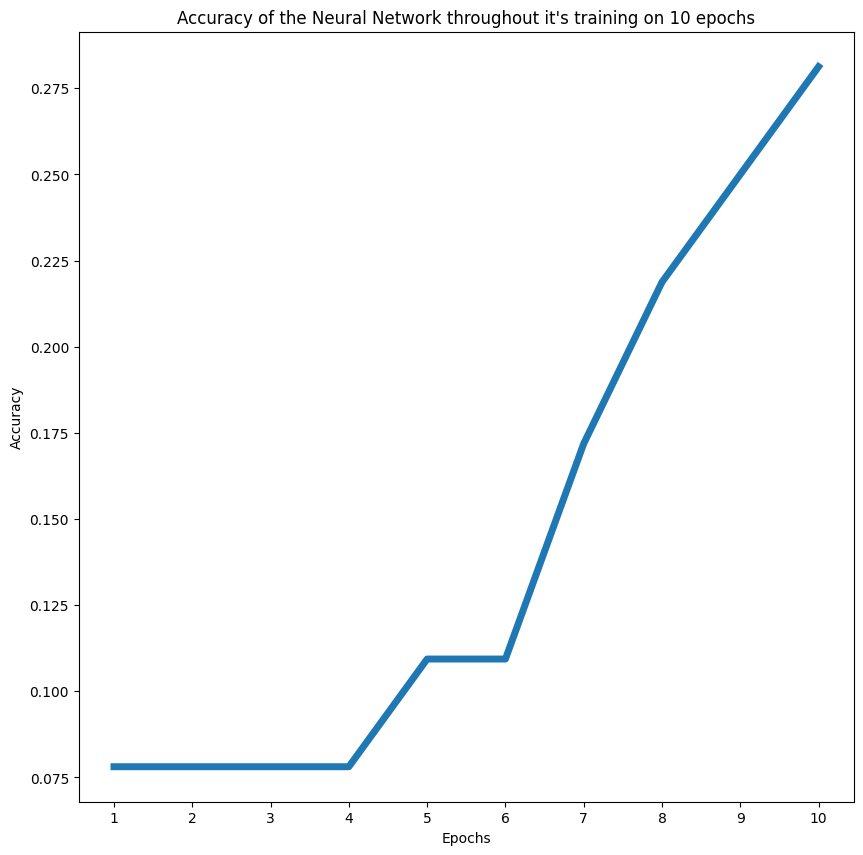

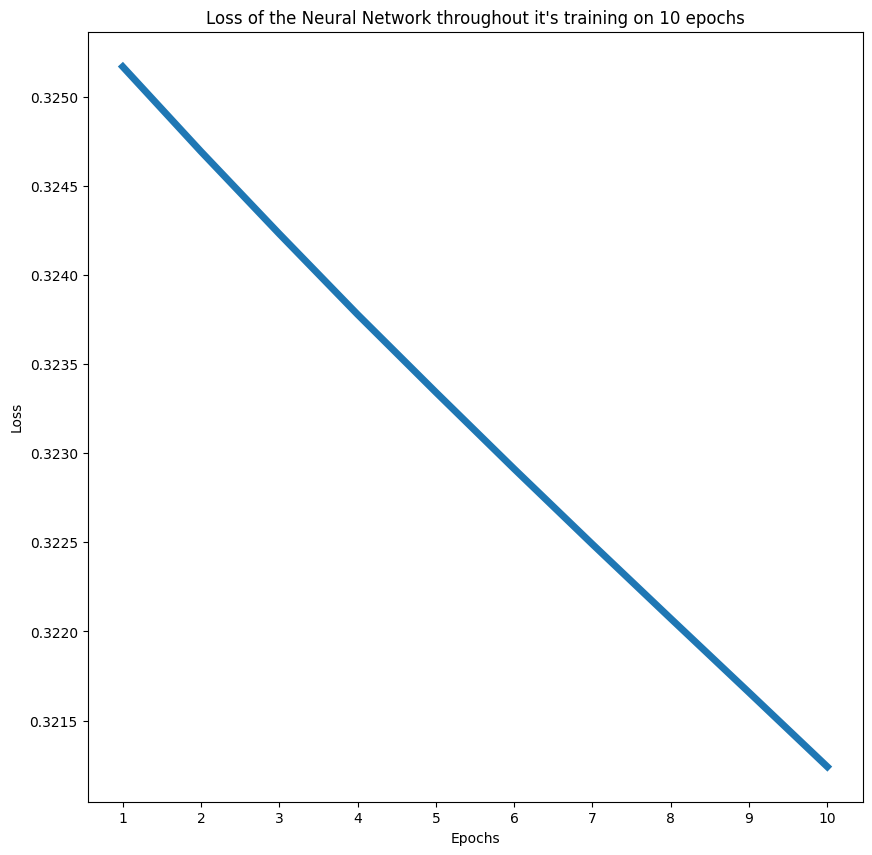

In [114]:
epochs_array = range(1,epochs+1)
print(epochs_array)
accuracy = mean_accuracy
loss = mean_loss
# bar_colors = ['tab:red', 'tab:blue']
plt.figure(1)
plt.figure(figsize = (10,10))
plt.xlabel("Epochs")
plt.xticks(range(1,11))
plt.ylabel("Accuracy")
plt.title(f"Accuracy of the Neural Network throughout it's training on {epochs} epochs")
plt.plot(epochs_array, mean_accuracy, linewidth=5)

plt.figure(2)
plt.figure(figsize = (10,10))
plt.xlabel("Epochs")
plt.xticks(range(1,11))
plt.ylabel("Loss")
plt.title(f"Loss of the Neural Network throughout it's training on {epochs} epochs")
plt.plot(epochs_array, loss, linewidth=5)

plt.show()

### Comparing the Accuracy and training time of our Neural Network to the Nearest Centroid and KNearest Neighbors Classifiers ###

<Figure size 640x480 with 0 Axes>

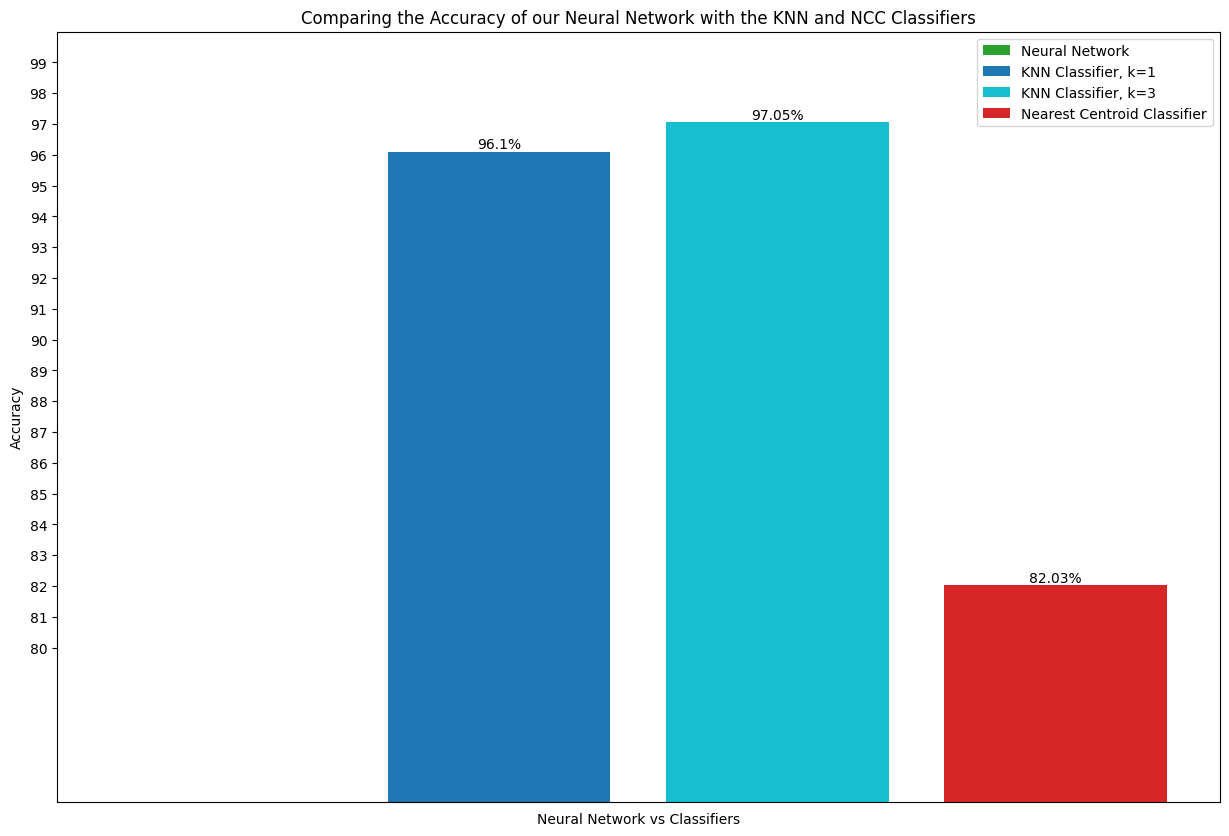

<Figure size 640x480 with 0 Axes>

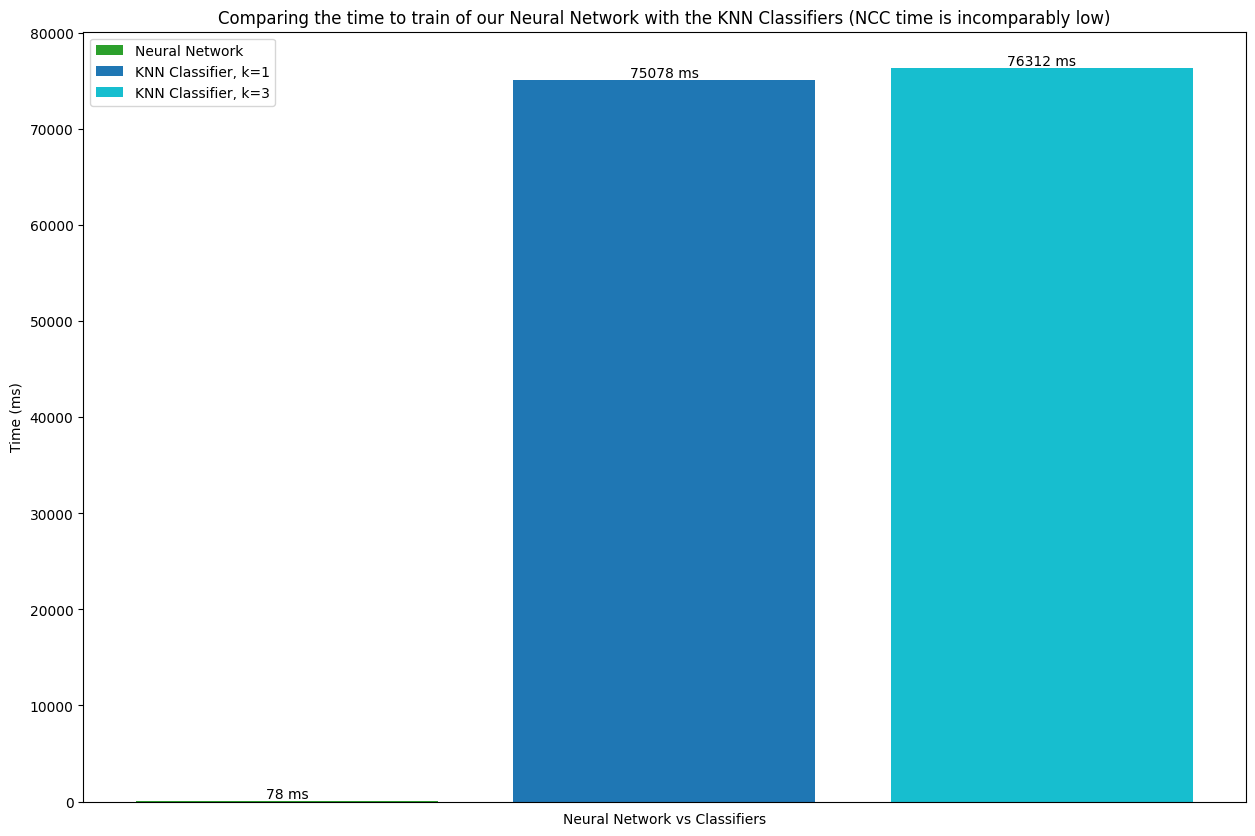

In [115]:
X = [1,2,3,4]
x2 = [1,2,3]
bar_colors1 = ['tab:green', 'tab:blue', 'tab:cyan', 'tab:red']


nn_acc = accuracy1
knn1_acc = 96.1 
knn3_acc = 97.05
ncc_acc = 82.03

accs = [nn_acc, knn1_acc, knn3_acc, ncc_acc]

nn_time = training_time
knn1_time = 75078
knn3_time = 76312

times = [nn_time, knn1_time, knn3_time]

plt.figure(1)
plt.figure(figsize = (15,10))
plt.ylim(75,100)
plt.yticks(range(80, 100, 1))
plt.bar(X, accs, color=bar_colors1, label=['Neural Network', 'KNN Classifier, k=1', 'KNN Classifier, k=3', 'Nearest Centroid Classifier'])
plt.annotate("" + str(accs[0]) + "%", xy = (X[0],accs[0]), ha='center', va='bottom')
plt.annotate("" + str(accs[1]) + "%", xy = (X[1],accs[1]), ha='center', va='bottom')
plt.annotate("" + str(accs[2]) + "%", xy = (X[2],accs[2]), ha='center', va='bottom')
plt.annotate("" + str(accs[3]) + "%", xy = (X[3],accs[3]), ha='center', va='bottom')

plt.title("Comparing the Accuracy of our Neural Network with the KNN and NCC Classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Neural Network vs Classifiers")

plt.xticks([])
plt.legend()
plt.show()

plt.figure(2)
plt.figure(figsize = (15,10))

# plt.ylim(75,100)
# plt.yticks(range(80, 100, 1))
plt.bar(x2, times, color=bar_colors1, label=['Neural Network', 'KNN Classifier, k=1', 'KNN Classifier, k=3'])
plt.annotate("" + str(times[0]) + " ms", xy = (x2[0],times[0]), ha='center', va='bottom')
plt.annotate("" + str(times[1]) + " ms", xy = (x2[1],times[1]), ha='center', va='bottom')
plt.annotate("" + str(times[2]) + " ms", xy = (x2[2],times[2]), ha='center', va='bottom')

plt.title("Comparing the time to train of our Neural Network with the KNN Classifiers (NCC time is incomparably low)")
plt.ylabel("Time (ms)")
plt.xlabel("Neural Network vs Classifiers")

plt.xticks([])
plt.legend()
plt.show()